In [5]:
#Package Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Options
pd.options.display.max_columns = None
%matplotlib inline
sns.set_style('darkgrid')


In [3]:
%%time
#File Imports
props16 = pd.read_csv("Data/Zillow/properties_2016.csv")
props17 = pd.read_csv("Data/Zillow/properties_2017.csv")
train16 = pd.read_csv("Data/Zillow/train_2016_v2.csv")
train17 = pd.read_csv("Data/Zillow/train_2017.csv")

<timed exec>:2: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:3: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 22.1 s


In [ ]:
prop_2016 = props16
prop_2017 = props17

In [ ]:
%%time
# Rename & retype the feature columns; also unify representations of missing values
def get_landuse_code_df(prop_2016, prop_2017):
    temp = prop_2016.groupby('county_landuse_code')['county_landuse_code'].count()
    landuse_codes = list(temp[temp >= 300].index)
    temp = prop_2017.groupby('county_landuse_code')['county_landuse_code'].count()
    landuse_codes += list(temp[temp >= 300].index)
    landuse_codes = list(set(landuse_codes))
    df_landuse_codes = pd.DataFrame({'county_landuse_code': landuse_codes,
                                     'county_landuse_code_id': range(len(landuse_codes))})
    return df_landuse_codes

def get_zoning_desc_code_df(prop_2016, prop_2017):
    temp = prop_2016.groupby('zoning_description')['zoning_description'].count()
    zoning_codes = list(temp[temp >= 5000].index)
    temp = prop_2017.groupby('zoning_description')['zoning_description'].count()
    zoning_codes += list(temp[temp >= 5000].index)
    zoning_codes = list(set(zoning_codes))
    df_zoning_codes = pd.DataFrame({'zoning_description': zoning_codes,
                                     'zoning_description_id': range(len(zoning_codes))})
    return df_zoning_codes

def process_columns(df, df_landuse_codes, df_zoning_codes):
    df = df.merge(how='left', right=df_landuse_codes, on='county_landuse_code')
    df = df.drop(['county_landuse_code'], axis=1)
    
    df = df.merge(how='left', right=df_zoning_codes, on='zoning_description')
    df = df.drop(['zoning_description'], axis=1)
    
    df.loc[df.county_id == 3101, 'county_id'] = 0
    df.loc[df.county_id == 1286, 'county_id'] = 1
    df.loc[df.county_id == 2061, 'county_id'] = 2
    
    df.loc[df.landuse_type_id == 279, 'landuse_type_id'] = 261
    return df

data_proc.rename_columns(prop_2016)
data_proc.rename_columns(prop_2017)

df_landuse_codes = get_landuse_code_df(prop_2016, prop_2017)
df_zoning_codes = get_zoning_desc_code_df(prop_2016, prop_2017)
prop_2016 = process_columns(prop_2016, df_landuse_codes, df_zoning_codes)
prop_2017 = process_columns(prop_2017, df_landuse_codes, df_zoning_codes)

data_proc.retype_columns(prop_2016)
data_proc.retype_columns(prop_2017)

prop_2017.head()

In [23]:
props16.loc[props16['parcelid'].isin(props17['parcelid'])]

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
def data_cleaning(df):
    #Convert binary columns to 0/1
    def binary_to_float(df, col):
        df.loc[df[col] == 'true', col] = '1'
        df.loc[df[col] == 'Y', col] = '1'
        df[col] = df[col].astype(float)
     
    for col in ['hashottuborspa', 'fireplaceflag', 'taxdelinquencyflag']:
        binary_to_float(df, col)
    
    
    df['fireplacecnt'].fillna(df['fireplaceflag'], inplace=True)
    #del df['fireplaceflag']
    df.loc[df['decktypeid'].notnull(), 'hasdeck'] = 1
    return df

In [25]:
def impute_values(df):
    #Replace all null values with 0 for the following variables
    impute_0_vars = ["yardbuildingsqft17", "fireplacecnt", "poolcnt", "garagecarcnt", "garagetotalsqft",
                 "pooltypeid2", "poolsizesum", "decktypeid", "taxdelinquencyflag"]
    #Replace all null values with the median for the following variables
    impute_median_vars = ["buildingqualitytypeid", "lotsizesquarefeet", "bathroomcnt", "bedroomcnt", "calculatedfinishedsquarefeet",
                      "structuretaxvaluedollarcnt", "landtaxvaluedollarcnt", "latitude", "longitude"]

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                  float64
heatingorsystemtypeid           float64
latitude                        float64


In [30]:
props16[['bathroomcnt', 'fullbathcnt', 'threequarterbathnbr']].loc[(props16['bathroomcnt']!=props16['fullbathcnt']) & (props16['fullbathcnt'].notnull()) ]

,bathroomcnt,fullbathcnt,threequarterbathnbr
245,2.5,2.0,1.0
246,3.5,3.0,1.0
247,2.5,2.0,1.0
262,3.5,3.0,1.0
264,2.5,2.0,1.0
...,...,...,...
2973746,2.5,2.0,1.0
2973752,2.5,2.0,1.0
2973756,2.5,2.0,1.0
2973765,2.5,2.0,1.0


In [31]:
props16.groupby('airconditioningtypeid').count()

,parcelid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,hasdeck
airconditioningtypeid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,742364,2402,0,742364,742364,20,709889,741881,0,0,742324,728292,0,13962,0,70,742364,7787,741881,20081,20081,12301,729190,742364,742364,704630,226229,0,11457,844,225385,742364,742364,716836,742364,720801,742364,355814,742110,742363,0,7060,2678,717414,0,0,742212,18352,1951,741829,742346,742364,742346,741749,14637,14638,738773,0
3.0,7,2,0,7,7,0,0,7,0,0,7,7,0,0,0,0,7,1,7,7,7,0,7,7,7,5,2,0,0,0,2,7,7,0,7,7,7,2,7,7,0,2,2,0,0,0,7,7,0,7,7,7,7,7,0,0,7,0
5.0,8795,35,0,8795,8795,0,0,8777,0,0,8795,8724,0,0,0,71,8795,6812,8777,8726,8726,548,8793,8795,8795,8394,2098,0,204,344,1754,8795,8795,0,8795,8579,8795,848,8795,8795,0,2153,40,12,0,0,8795,8137,132,8792,8795,8795,8794,8791,64,64,8791,0
9.0,19,0,0,19,19,2,18,16,0,0,19,16,0,3,0,0,19,0,16,0,0,0,15,19,19,19,0,0,0,0,0,19,19,19,19,19,19,5,19,19,0,0,0,19,0,0,19,2,0,18,19,19,19,19,0,0,18,0
11.0,1818,585,0,1818,1818,0,0,1814,0,0,1818,1802,0,0,0,16,1818,576,1814,1762,1762,29,1815,1818,1818,870,883,0,13,16,867,1818,1818,0,1818,1794,1818,276,1818,1818,0,464,630,1,0,0,1817,1793,268,1815,1818,1818,1818,1818,28,28,1817,0
12.0,59,11,0,59,59,0,0,59,0,0,59,59,0,0,0,0,59,31,59,58,58,1,59,59,59,47,17,0,1,0,17,59,59,0,59,58,59,14,59,59,0,8,11,0,0,0,59,59,4,59,59,59,59,59,0,0,59,0
13.0,58457,129,0,58457,58457,1557,1121,56517,0,0,58456,56361,0,1605,0,490,58457,22860,56517,55757,55757,4763,308,58457,58457,58333,17595,0,2050,2713,14882,58457,58457,1634,58457,57953,58457,13452,58448,58457,0,22814,146,716,0,0,58429,58080,113,58430,58454,58457,58454,58415,461,461,56843,0


In [32]:
props16.groupby('heatingorsystemtypeid').count()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,hasdeck
heatingorsystemtypeid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,262,129,100,0,262,262,0,0,262,0,0,262,261,0,0,0,1,262,1,262,261,261,1,262,262,148,131,0,1,0,131,262,262,0,262,259,262,19,262,262,0,149,108,0,0,0,262,261,23,262,262,262,262,262,3,3,262,0
2.0,1156830,707110,1,0,1156826,1156830,74,1144843,1156336,0,0,1156777,1156026,0,751,0,0,1156830,0,1156336,2,2,17246,1156830,1156830,1127757,320023,0,17246,0,320023,1156829,1156830,1152229,1156830,1132072,1156830,546453,1156510,1156824,0,0,1,1152689,0,0,1156761,146,2,1155966,1156764,1156830,1156764,1155877,23134,23136,1152386,0
6.0,27480,21885,5215,0,27480,27480,0,0,27440,0,0,27480,27372,0,0,0,108,27480,14588,27440,27334,27334,1816,27480,27480,20915,12128,0,628,1188,10940,27480,27480,0,27480,27088,27480,3711,27478,27480,0,10036,5830,22,0,0,27480,24544,4808,27474,27480,27480,27480,27476,209,209,27461,0
7.0,595453,1941,373,0,595450,595450,676,591922,594163,0,0,595424,593411,0,1957,0,56,595453,727,594163,2033,2033,2681,595453,595453,592808,42408,0,2665,16,42392,595453,595453,592874,595453,589193,595453,284593,595198,595442,0,496,398,592608,0,0,595077,2706,159,594139,595383,595453,595382,593949,17578,17578,593968,0
10.0,39,28,26,0,39,39,0,0,39,0,0,39,38,0,0,0,1,39,5,39,38,38,0,39,39,18,26,0,0,0,26,39,39,0,39,39,39,12,39,39,0,17,29,0,0,0,39,38,13,39,39,39,39,39,1,1,39,0
11.0,16,14,10,0,16,16,0,0,16,0,0,16,16,0,0,0,0,16,0,16,16,16,0,16,16,5,13,0,0,0,13,16,16,0,16,16,16,3,16,16,0,3,11,0,0,0,16,16,0,16,16,16,16,16,1,1,16,0
12.0,25,19,15,0,25,25,0,0,25,0,0,25,25,0,0,0,0,25,0,25,25,25,0,25,25,0,25,0,0,0,25,25,25,0,25,25,25,2,25,25,0,3,17,0,0,0,25,25,10,25,25,25,25,25,1,1,25,0
13.0,1342,997,2,0,1342,1342,0,0,1342,0,0,1342,1342,0,0,0,0,1342,113,1342,1308,1308,28,1342,1342,550,48,0,14,14,34,1342,1342,0,1342,1334,1342,9,1342,1342,0,656,3,0,0,0,1342,358,2,1342,1342,1342,1342,1342,10,10,1342,0
14.0,41,16,0,0,41,41,0,0,41,0,0,41,41,0,0,0,0,41,32,41,41,41,1,41,41,41,9,0,0,1,8,41,41,0,41,41,41,12,41,41,0,3,0,0,0,0,41,41,0,41,41,41,41,41,1,1,41,0


<AxesSubplot:>

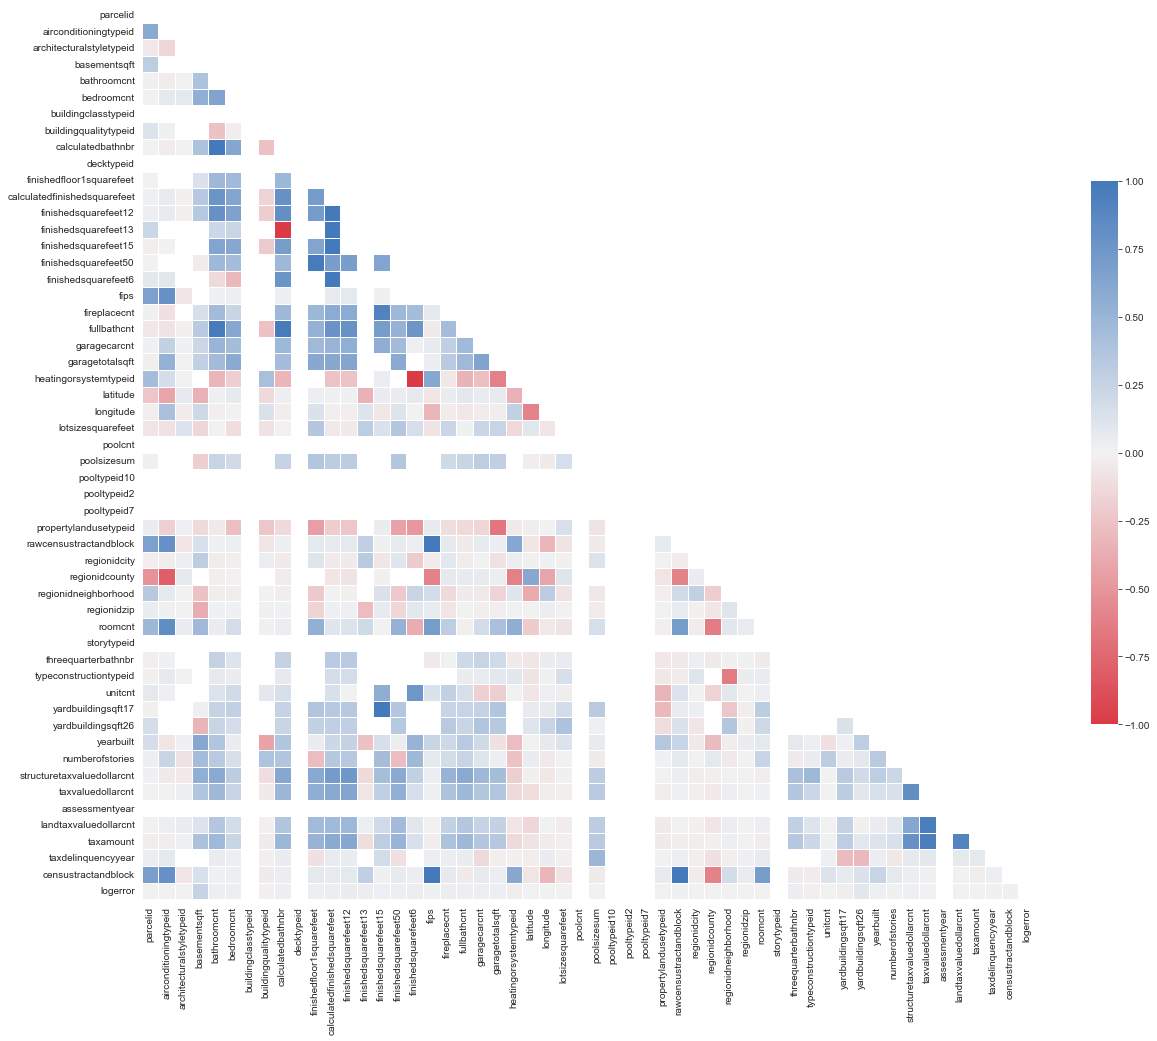

logerror                        1.000000
basementsqft                    0.253395
yardbuildingsqft26              0.086179
finishedsquarefeet12            0.041922
calculatedfinishedsquarefeet    0.038784
finishedsquarefeet6             0.036847
finishedsquarefeet13            0.034715
threequarterbathnbr             0.034069
fireplacecnt                    0.033235
calculatedbathnbr               0.029448
fullbathcnt                     0.028845
bathroomcnt                     0.027889
garagecarcnt                    0.026531
finishedfloor1squarefeet        0.026242
bedroomcnt                      0.025467
garagetotalsqft                 0.023888
finishedsquarefeet50            0.023619
structuretaxvaluedollarcnt      0.022085
finishedsquarefeet15            0.019327
yearbuilt                       0.017312
numberofstories                 0.013075
censustractandblock             0.008892
rawcensustractandblock          0.008376
fips                            0.008363
taxvaluedollarcn

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
parcelid,1.000000,0.588425,-0.047806,0.294147,-0.014073,0.004971,NaN,0.121008,-0.002608,NaN,-0.004743,0.016994,0.027694,0.221820,-0.022631,-0.005233,0.081681,0.666831,0.008691,-0.060762,0.014834,-0.019875,0.443389,-0.240284,-0.018132,-0.072500,NaN,-0.012003,NaN,NaN,NaN,0.044031,0.666216,-0.018055,-0.515921,0.341805,0.044127,0.485618,NaN,-0.021364,-0.011262,0.074682,-0.008898,0.168313,0.167428,0.029649,0.008460,0.003840,NaN,0.001010,-0.030728,0.033895,0.676362,0.004837
airconditioningtypeid,0.588425,1.000000,-0.154656,NaN,-0.037479,0.075327,NaN,0.008108,-0.034114,NaN,NaN,0.059667,0.060756,NaN,-0.004198,NaN,0.087908,0.801066,-0.094330,-0.085900,0.270857,0.525605,0.166070,-0.417596,0.415025,-0.090773,NaN,NaN,NaN,NaN,NaN,-0.184659,0.800300,-0.028014,-0.801066,0.074884,0.013834,0.831973,NaN,0.010028,0.062502,0.020661,NaN,NaN,-0.074885,0.234819,-0.047324,-0.001102,NaN,0.027169,-0.028251,0.076337,0.797531,0.005179
architecturalstyletypeid,-0.047806,-0.154656,1.000000,NaN,-0.003398,0.071646,NaN,NaN,-0.003398,NaN,NaN,-0.015532,-0.015532,NaN,NaN,NaN,NaN,-0.063370,NaN,-0.011198,0.010195,0.002294,-0.004112,0.069126,-0.031748,0.121985,NaN,NaN,NaN,NaN,NaN,0.018631,-0.063324,0.024850,0.063370,0.004122,-0.006501,0.049794,NaN,NaN,-0.005481,NaN,NaN,NaN,0.009546,-0.086010,-0.047364,0.028603,NaN,0.050978,0.020860,NaN,-0.063332,-0.004276
basementsqft,0.294147,NaN,NaN,1.000000,0.392206,0.554301,NaN,NaN,0.394347,NaN,0.130140,0.341610,0.341610,NaN,NaN,-0.031274,NaN,NaN,0.149221,0.318947,0.225713,0.277500,NaN,-0.344171,0.203418,-0.144900,NaN,-0.191167,NaN,NaN,NaN,-0.129166,0.142869,0.291491,NaN,-0.263337,-0.382571,0.466267,NaN,NaN,NaN,NaN,0.017574,-0.329200,0.610367,0.437536,0.549054,0.372581,NaN,0.123864,0.406130,NaN,0.142869,0.253395
bathroomcnt,-0.014073,-0.037479,-0.003398,0.392206,1.000000,0.646120,NaN,-0.259748,1.000000,NaN,0.477264,0.772553,0.799372,0.212847,0.633631,0.469382,-0.140220,0.009485,0.448016,0.984130,0.502429,0.451062,-0.324459,0.022711,-0.018347,-0.000197,NaN,0.243534,NaN,NaN,NaN,-0.052871,0.009713,-0.037242,-0.022745,-0.029097,0.012265,0.044461,NaN,0.260263,0.066641,0.119038,0.253754,0.234899,0.368061,0.320834,0.586641,0.476363,NaN,0.353806,0.461900,0.046710,0.013078,0.027889
bedroomcnt,0.004971,0.075327,0.071646,0.554301,0.646120,1.000000,NaN,-0.025736,0.618060,NaN,0.458030,0.632035,0.657599,0.230639,0.615172,0.444599,-0.319663,0.023550,0.234765,0.613753,0.432115,0.591496,-0.188627,0.066331,-0.004879,-0.113984,NaN,0.180900,NaN,NaN,NaN,-0.271022,0.024190,-0.022166,-0.002939,-0.024194,0.014874,0.164484,NaN,0.111312,0.041350,0.180838,0.280245,0.169960,0.040871,0.150591,0.305405,0.241329,NaN,0.173205,0.239118,0.023705,0.028170,0.025467
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,0.121008,0.008108,NaN,NaN,-0.259748,-0.025736,NaN,1.000000,-0.259258,NaN,NaN,-0.158691,-0.196411,NaN,-0.212024,NaN,NaN,NaN,NaN,-0.259258,NaN,NaN,0.415216,-0.134659,0.135084,-0.086515,NaN,